In [54]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt

## Import Mobility Data

In [2]:
# keep FIPS as string to preserve leading zeroes
# https://www.google.com/covid19/mobility/

In [3]:
mob = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_inputs/2020_US_Region_Mobility_Report.csv", dtype={'census_fips_code': 'str'} )

In [60]:
mob.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB'],
      dtype='object')

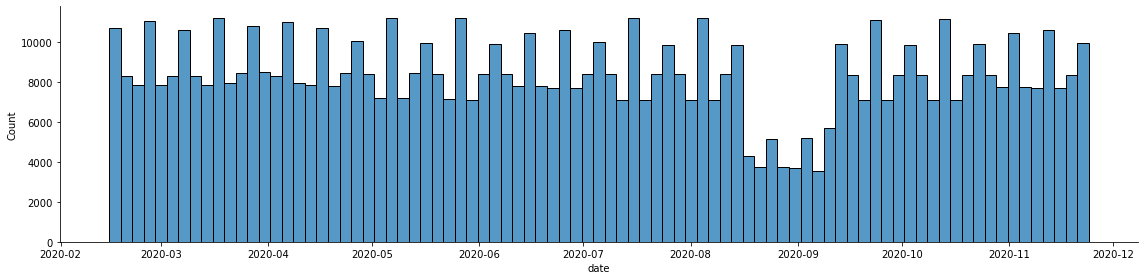

In [56]:
sns.displot(mob.date, height=4, aspect=4, )
#plt.xticks(ticks_locations, labels, rotation=90)

In [73]:
pharm = mob[['grocery_and_pharmacy_PCT_CFB','date']].dropna()
work = mob[['workplaces_PCT_CFB','date']].dropna()
tr = mob[['transit_stations_PCT_CFB','date']].dropna()
park = mob[['parks_PCT_CFB','date']].dropna()
res = mob[['residential_PCT_CFB','date']].dropna()
ret = mob[['retail_and_recreation_PCT_CFB','date']].dropna()

In [75]:
list_frames = [
(pharm, 'grocery and pharmacy'),
(work, 'workplaces'),
(tr, 'transit stations'),
(park, 'parks'),
(res, 'residential'),
(ret, 'retail and recreation')
]

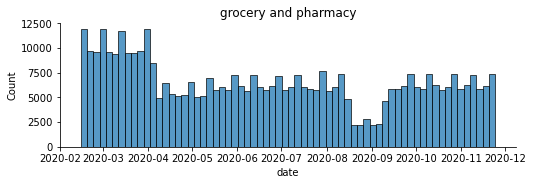

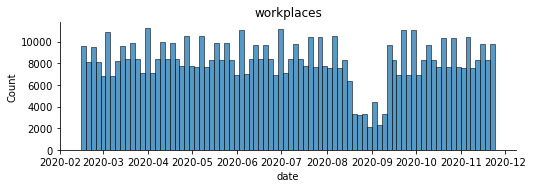

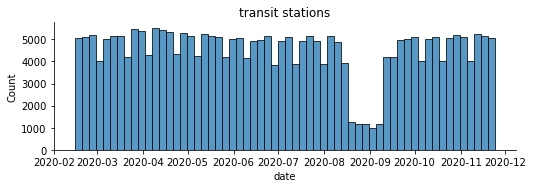

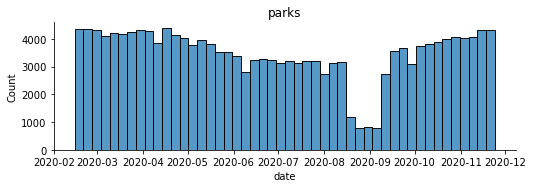

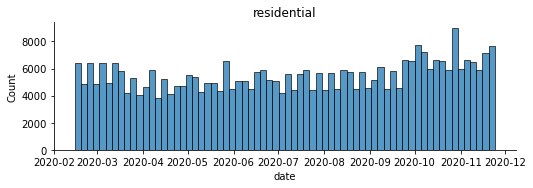

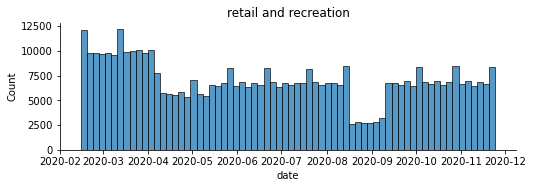

In [77]:
for i in list_frames:
    sns.displot(i[0].date, height=2.5, aspect=3, )
    plt.title("{x}".format(x=i[1]))

In [5]:
mob['date'] = mob['date'].astype('datetime64')

In [6]:
mob_renam_col = [i.replace('percent_change_from_baseline', 'PCT_CFB') for i in mob.columns]

In [7]:
mob.columns = mob_renam_col

In [8]:
mob_renam_col

['country_region_code',
 'country_region',
 'sub_region_1',
 'sub_region_2',
 'metro_area',
 'iso_3166_2_code',
 'census_fips_code',
 'date',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB']

In [9]:
mob.dtypes

country_region_code                      object
country_region                           object
sub_region_1                             object
sub_region_2                             object
metro_area                              float64
iso_3166_2_code                          object
census_fips_code                         object
date                             datetime64[ns]
retail_and_recreation_PCT_CFB           float64
grocery_and_pharmacy_PCT_CFB            float64
parks_PCT_CFB                           float64
transit_stations_PCT_CFB                float64
workplaces_PCT_CFB                      float64
residential_PCT_CFB                     float64
dtype: object

In [10]:
mob.sort_values(by="date", inplace=True)

In [11]:
mob.head(5)

country_region_code country_region sub_region_1      sub_region_2  \
0                       US  United States          NaN               NaN   
78743                   US  United States      Florida   Escambia County   
552960                  US  United States    Tennessee  Claiborne County   
553394                  US  United States    Tennessee      Cocke County   
78459                   US  United States      Florida      Duval County   

        metro_area iso_3166_2_code census_fips_code       date  \
0              NaN             NaN              NaN 2020-02-15   
78743          NaN             NaN            12033 2020-02-15   
552960         NaN             NaN            47025 2020-02-15   
553394         NaN             NaN            47029 2020-02-15   
78459          NaN             NaN            12031 2020-02-15   

        retail_and_recreation_PCT_CFB  grocery_and_pharmacy_PCT_CFB  \
0                                 6.0                           2.0   
78743                             5.0                           0.0   
552960                           -2.0                           9.0   
553394                           13.0                           4.0   
78459                             2.0                           0.0   

        parks_PCT_CFB  transit_stations_PCT_CFB  workplaces_PCT_CFB  \
0                15.0                       3.0                 2.0   
78743            63.0                      15.0                 3.0   
552960            NaN                       NaN                -5.0   
553394          -10.0                       NaN                 4.0   
78459            10.0                       5.0                -1.0   

        residential_PCT_CFB  
0                      -1.0  
78743                  -1.0  
552960                  NaN  
553394                  NaN  
78459                  -1.0

## Compute Rolling Average of Mobility Data

In [12]:
list_all_locations = list(mob.census_fips_code.unique())
list_frames = []
for i in list_all_locations:
    frame = mob[mob.census_fips_code == i]
    frame['retail_and_recreation_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['retail_and_recreation_PCT_CFB'].mean()
    frame['grocery_and_pharmacy_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['grocery_and_pharmacy_PCT_CFB'].mean()
    frame['parks_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['parks_PCT_CFB'].mean()
    frame['transit_stations_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['transit_stations_PCT_CFB'].mean()
    frame['workplaces_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['workplaces_PCT_CFB'].mean()
    frame['residential_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['residential_PCT_CFB'].mean()
    list_frames.append(frame)

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [13]:
recombine = pd.concat(list_frames)

In [14]:
mobility_final = recombine

In [15]:
mobility_final['Date'] = mobility_final['date']

mobility_final.drop(columns=['date'], inplace=True)

In [16]:
mobility_final['County_FIPS'] = mobility_final['census_fips_code']
mobility_final.drop(columns=['census_fips_code'], inplace=True)

In [17]:
mobility_final[(mobility_final.County_FIPS == "12009") & (mobility_final.Date > '2020-10-01')].head(-18)

country_region_code country_region sub_region_1    sub_region_2  \
75966                  US  United States      Florida  Brevard County   
75967                  US  United States      Florida  Brevard County   
75968                  US  United States      Florida  Brevard County   
75969                  US  United States      Florida  Brevard County   
75970                  US  United States      Florida  Brevard County   
75971                  US  United States      Florida  Brevard County   
75972                  US  United States      Florida  Brevard County   
75973                  US  United States      Florida  Brevard County   
75974                  US  United States      Florida  Brevard County   
75975                  US  United States      Florida  Brevard County   
75976                  US  United States      Florida  Brevard County   
75977                  US  United States      Florida  Brevard County   
75978                  US  United States      Florida  Brevard County   
75979                  US  United States      Florida  Brevard County   
75980                  US  United States      Florida  Brevard County   
75981                  US  United States      Florida  Brevard County   
75982                  US  United States      Florida  Brevard County   
75983                  US  United States      Florida  Brevard County   
75984                  US  United States      Florida  Brevard County   
75985                  US  United States      Florida  Brevard County   
75986                  US  United States      Florida  Brevard County   
75987                  US  United States      Florida  Brevard County   
75988                  US  United States      Florida  Brevard County   
75989                  US  United States      Florida  Brevard County   
75990                  US  United States      Florida  Brevard County   
75991                  US  United States      Florida  Brevard County   
75992                  US  United States      Florida  Brevard County   
75993                  US  United States      Florida  Brevard County   
75994                  US  United States      Florida  Brevard County   
75995                  US  United States      Florida  Brevard County   
75996                  US  United States      Florida  Brevard County   
75997                  US  United States      Florida  Brevard County   
75998                  US  United States      Florida  Brevard County   
75999                  US  United States      Florida  Brevard County   
76000                  US  United States      Florida  Brevard County   
76001                  US  United States      Florida  Brevard County   

       metro_area iso_3166_2_code  retail_and_recreation_PCT_CFB  \
75966         NaN             NaN                          -18.0   
75967         NaN             NaN                          -23.0   
75968         NaN             NaN                          -19.0   
75969         NaN             NaN                          -22.0   
75970         NaN             NaN                          -19.0   
75971         NaN             NaN                          -19.0   
75972         NaN             NaN                          -20.0   
75973         NaN             NaN                          -19.0   
75974         NaN             NaN                          -21.0   
75975         NaN             NaN                          -20.0   
75976         NaN             NaN                          -20.0   
75977         NaN             NaN                          -19.0   
75978         NaN             NaN                          -17.0   
75979         NaN             NaN                          -18.0   
75980         NaN             NaN                          -19.0   
75981         NaN             NaN                          -19.0   
75982         NaN             NaN                          -20.0   
75983         NaN             NaN                          -22.0   
75984       

## Import County-Level Dataset

In [18]:
counties = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/counties_dataset_full.csv",dtype={'County_FIPS':'str'})

In [19]:
counties.dtypes

Unnamed: 0                 int64
County_FIPS               object
StateCD                   object
Name                      object
HS_DIPLOMA_ONLY_2018     float64
SOME_COLLEGE_2018        float64
BACHELORS_PLUS_2018      float64
Poverty_PCT_2018         float64
UrbanCD                    int64
Median_Income_2018       float64
Population_ACS           float64
Population_Black_ACS     float64
Population_Hisp_ACS      float64
Population_Native_ACS    float64
PCT_Black_ACS            float64
PCT_Hisp_ACS             float64
PCT_Native_ACS           float64
UrbanCD_Description       object
Metro                     object
dtype: object

In [20]:
#mobility_counties = mobility_final.merge(counties, on = "census_fips_code", how="left")

## Bring in the COVID Data to be Joined In 

In [21]:
covid = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/covid_dataset_full.csv",dtype={'County_FIPS':'str'})

In [22]:
covid.Date = covid.Date.astype("datetime64")

In [23]:
covid.shape[0]

1015560

In [24]:
mobility_final.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'retail_and_recreation_PCT_CFB',
       'grocery_and_pharmacy_PCT_CFB', 'parks_PCT_CFB',
       'transit_stations_PCT_CFB', 'workplaces_PCT_CFB', 'residential_PCT_CFB',
       'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'Date', 'County_FIPS'],
      dtype='object')

In [25]:
covid_mobility = covid.merge(mobility_final, on =['Date','County_FIPS'], how="left")

In [26]:
# Join in the Urban Data

In [27]:
mobility_covid_urban = covid_mobility.merge(counties, on=['County_FIPS'])

In [28]:
# Can't deal with the + signs, so remove these 

large_columns = list(mobility_covid_urban.columns)
large_columns = [x.replace('+','') for x in large_columns]
mobility_covid_urban.columns = large_columns

In [29]:
list(mobility_covid_urban.columns)

['Unnamed: 0_x',
 'Date',
 'Admin2',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'locationcol',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',
 'Deaths_New_28_RollingAvg',
 'County_FIPS',
 'State Code',
 'Region',
 'Division',
 'country_region_code',
 'country_region',
 'sub_region_1',
 'sub_region_2',
 'metro_area',
 'iso_3166_2_code',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'Unnamed: 0_y',
 'St

In [30]:
columns = [ 'Date',
 'County_FIPS',
 'State Code',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'locationcol',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',
 'Deaths_New_28_RollingAvg',
 ]

In [31]:
combined_dataset_sub = mobility_covid_urban[columns]

In [32]:
combined_dataset_sub

Date County_FIPS State Code            Name  \
0      2020-01-22       01001         AL  Autauga County   
1      2020-01-23       01001         AL  Autauga County   
2      2020-01-24       01001         AL  Autauga County   
3      2020-01-25       01001         AL  Autauga County   
4      2020-01-26       01001         AL  Autauga County   
...           ...         ...        ...             ...   
970295 2020-11-22       56045         WY   Weston County   
970296 2020-11-23       56045         WY   Weston County   
970297 2020-11-24       56045         WY   Weston County   
970298 2020-11-25       56045         WY   Weston County   
970299 2020-11-26       56045         WY   Weston County   

        retail_and_recreation_PCT_CFB  grocery_and_pharmacy_PCT_CFB  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   
...                               ...                           ...   
970295                            NaN                           NaN   
970296                            NaN                           NaN   
970297                            NaN                           NaN   
970298                            NaN                           NaN   
970299                            NaN                           NaN   

        parks_PCT_CFB  transit_stations_PCT_CFB  workplaces_PCT_CFB  \
0                 NaN                       NaN                 NaN   
1                 NaN                       NaN                 NaN   
2                 NaN                       NaN                 NaN   
3                 NaN                       NaN                 NaN   
4                 NaN                       NaN                 NaN   
...               ...                       ...                 ...   
970295            NaN                       NaN                 NaN   
970296            NaN                       NaN               -23.0   
970297            NaN                       NaN               -21.0   
970298            NaN                       NaN                 NaN   
970299            NaN                       NaN                 NaN   

        residential_PCT_CFB  ...  Deaths_New_21  Deaths_New_28  Confirmed_New  \
0                       NaN  ...            0.0            0.0            NaN   
1                       NaN  ...            0.0            0.0            0.0   
2                       NaN  ...            0.0            0.0            0.0   
3                       NaN  ...            0.0            0.0            0.0   
4                       NaN  ...            0.0            0.0            0.0   
...                     ...  ...            ...            ...            ...   
970295                  NaN  ...            NaN            NaN            6.0   
970296                  NaN  ...            NaN            NaN            0.0   
970297                  NaN  ...            NaN            NaN           11.0   
970298                  NaN  ...            NaN            NaN            3.0   
970299                  NaN  ...            NaN            NaN            0.0   

            locationcol  Confirmed_New_RollingAvg  Deaths_New_RollingAvg  \
0       Autauga|Alabama                       NaN                    NaN   
1       Autauga|Alabama                       NaN                    NaN   
2       Autauga|Alabama                       NaN                    NaN   
3       Autauga|Alabama                       NaN                    NaN   
4       Autauga|Alabama                       NaN                    NaN   
...                 ...                       ...                    ...   
970295   Weston|Wyoming                  4.714286               0.000000   
97029

In [33]:
#check to see matching
combined_dataset_sub[['State','State Code']].sample(frac=.00004)


State State Code
60494     California         CA
93001       Colorado         CO
650771          Ohio         OH
764954     Tennessee         TN
387362      Michigan         MI
407311     Minnesota         MN
794087         Texas         TX
792701         Texas         TX
392583      Michigan         MI
93059       Colorado         CO
90172       Colorado         CO
816677         Texas         TX
394798      Michigan         MI
388132      Michigan         MI
494258       Montana         MT
732807  South Dakota         SD
795391         Texas         TX
695037  Pennsylvania         PA
18086        Alabama         AL
126523       Georgia         GA
15550        Alabama         AL
817610         Texas         TX
306056        Kansas         KS
197676      Illinois         IL
86621       Colorado         CO
353701     Louisiana         LA
321093      Kentucky         KY
347348     Louisiana         LA
344964     Louisiana         LA
670566      Oklahoma         OK
189966      Illinois         IL
665322      Oklahoma         OK
641759          Ohio         OH
781000         Texas         TX
770833     Tennessee         TN
45177       Arkansas         AR
359269     Louisiana         LA
13423        Alabama         AL
286147        Kansas         KS

In [34]:
def create_percapita_measures(dataframe):
    list_col = list(dataframe.columns)
    for i in list(dataframe.columns):
        if "death" in i.lower() or "confirmed" in i.lower() and "previous" not in i.lower() :
            try:
                new_col_name = i+'_PER_100K'
                dataframe[new_col_name] = dataframe[i]/(dataframe['Population_ACS']/100000)
            except:
                print("error occurred for {i}".format(i=i)) 

In [35]:
create_percapita_measures(combined_dataset_sub)

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
list(combined_dataset_sub.columns)

['Date',
 'County_FIPS',
 'State Code',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'locationcol',
 'Confirmed_New_RollingAvg',
 'Deaths

In [37]:
combined_dataset_sub.dtypes

Date                                 datetime64[ns]
County_FIPS                                  object
State Code                                   object
Name                                         object
retail_and_recreation_PCT_CFB               float64
                                          ...      
Deaths_New_RollingAvg_PER_100K              float64
Deaths_New_7_RollingAvg_PER_100K            float64
Deaths_New_14_RollingAvg_PER_100K           float64
Deaths_New_21_RollingAvg_PER_100K           float64
Deaths_New_28_RollingAvg_PER_100K           float64
Length: 65, dtype: object

In [38]:
combined_dataset_sub.Deaths_New_7_RollingAvg_PER_100K.isna().value_counts()

False    929610
True      40690
Name: Deaths_New_7_RollingAvg_PER_100K, dtype: int64

In [39]:
combined_dataset_sub.Population_ACS.isna().value_counts()

False    970300
Name: Population_ACS, dtype: int64

In [40]:
combined_dataset_sub.Deaths_New_7_RollingAvg_PER_100K.isna().value_counts()

False    929610
True      40690
Name: Deaths_New_7_RollingAvg_PER_100K, dtype: int64

In [41]:
combined_dataset_sub.Metro.isna().value_counts()

False    970300
Name: Metro, dtype: int64

## Get Regions

In [42]:
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [43]:
regions= regions.drop(['State'], axis=1)

In [44]:
regions

State Code     Region            Division
0          AK       West             Pacific
1          AL      South  East South Central
2          AR      South  West South Central
3          AZ       West            Mountain
4          CA       West             Pacific
5          CO       West            Mountain
6          CT  Northeast         New England
7          DC      South      South Atlantic
8          DE      South      South Atlantic
9          FL      South      South Atlantic
10         GA      South      South Atlantic
11         HI       West             Pacific
12         IA    Midwest  West North Central
13         ID       West            Mountain
14         IL    Midwest  East North Central
15         IN    Midwest  East North Central
16         KS    Midwest  West North Central
17         KY      South  East South Central
18         LA      South  West South Central
19         MA  Northeast         New England
20         MD      South      South Atlantic
21         ME  Northeast         New England
22         MI    Midwest  East North Central
23         MN    Midwest  West North Central
24         MO    Midwest  West North Central
25         MS      South  East South Central
26         MT       West            Mountain
27         NC      South      South Atlantic
28         ND    Midwest  West North Central
29         NE    Midwest  West North Central
30         NH  Northeast         New England
31         NJ  Northeast     Middle Atlantic
32         NM       West            Mountain
33         NV       West            Mountain
34         NY  Northeast     Middle Atlantic
35         OH    Midwest  East North Central
36         OK      South  West South Central
37         OR       West             Pacific
38         PA  Northeast     Middle Atlantic
39         RI  Northeast         New England
40         SC      South      South Atlantic
41         SD    Midwest  West North Central
42         TN      South  East South Central
43         TX      South  West South Central
44         UT       West            Mountain
45         VA      South      South Atlantic
46         VT  Northeast         New England
47         WA       West             Pacific
48         WI    Midwest  East North Central
49         WV      South      South Atlantic
50         WY       West            Mountain

In [45]:
nostate = combined_dataset_sub[combined_dataset_sub['State Code'].isna()==True]

In [46]:
combined_dataset_sub_states = combined_dataset_sub[combined_dataset_sub['State Code'].isna()==False]

In [47]:
combined_dataset_sub_regions = combined_dataset_sub_states.merge(regions, on="State Code", how="inner")

In [48]:
combined_dataset_sub_regions.Division.isna().value_counts()

False    970300
Name: Division, dtype: int64

In [49]:
combined_dataset_sub_regions['Date']

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
970295   2020-11-22
970296   2020-11-23
970297   2020-11-24
970298   2020-11-25
970299   2020-11-26
Name: Date, Length: 970300, dtype: datetime64[ns]

## Export to File

In [50]:

os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
path = str(os.getcwd())
filename = "hia_covid_combined.csv"
combined_dataset_sub_regions.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_combined.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [51]:

os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
path = str(os.getcwd())
filename = "hia_covid_combined_sample.csv"
combined_dataset_sub_regions.sample(frac=.10).to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_combined_sample.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets
